In [1]:
# Import necessary libraries
import random
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch

# Check if CUDA (GPU) is available for PyTorch, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

dataset_path = '/content/drive/MyDrive/project_data'

# Verifying the connection by listing files in the path
if os.path.exists(dataset_path):
    print("Contents of the dataset path:")
    print(os.listdir(dataset_path))
else:
    print("Path does not exist. Check if the path is correct or if the drive is mounted.")


Contents of the dataset path:
['test', 'val', 'test.csv', 'val.csv', 'train.csv', 'train']


In [5]:
# Define directory paths for datasets
DATASET_PATH = "/content/drive/MyDrive/project_data/"

TRAIN_DIR = DATASET_PATH + 'train'
VAL_DIR = DATASET_PATH + 'val'
TEST_DIR = DATASET_PATH + 'test'

# Define paths for CSV metadata files (train, validation, and test data)
TRAIN_CSV = DATASET_PATH + 'train.csv'
VAL_CSV = DATASET_PATH + 'val.csv'
TEST_CSV = DATASET_PATH + 'test.csv'

In [6]:
# Load the CSV files into pandas DataFrames
train_df = pd.read_csv(TRAIN_CSV)
val_df = pd.read_csv(VAL_CSV)
test_df = pd.read_csv(TEST_CSV)


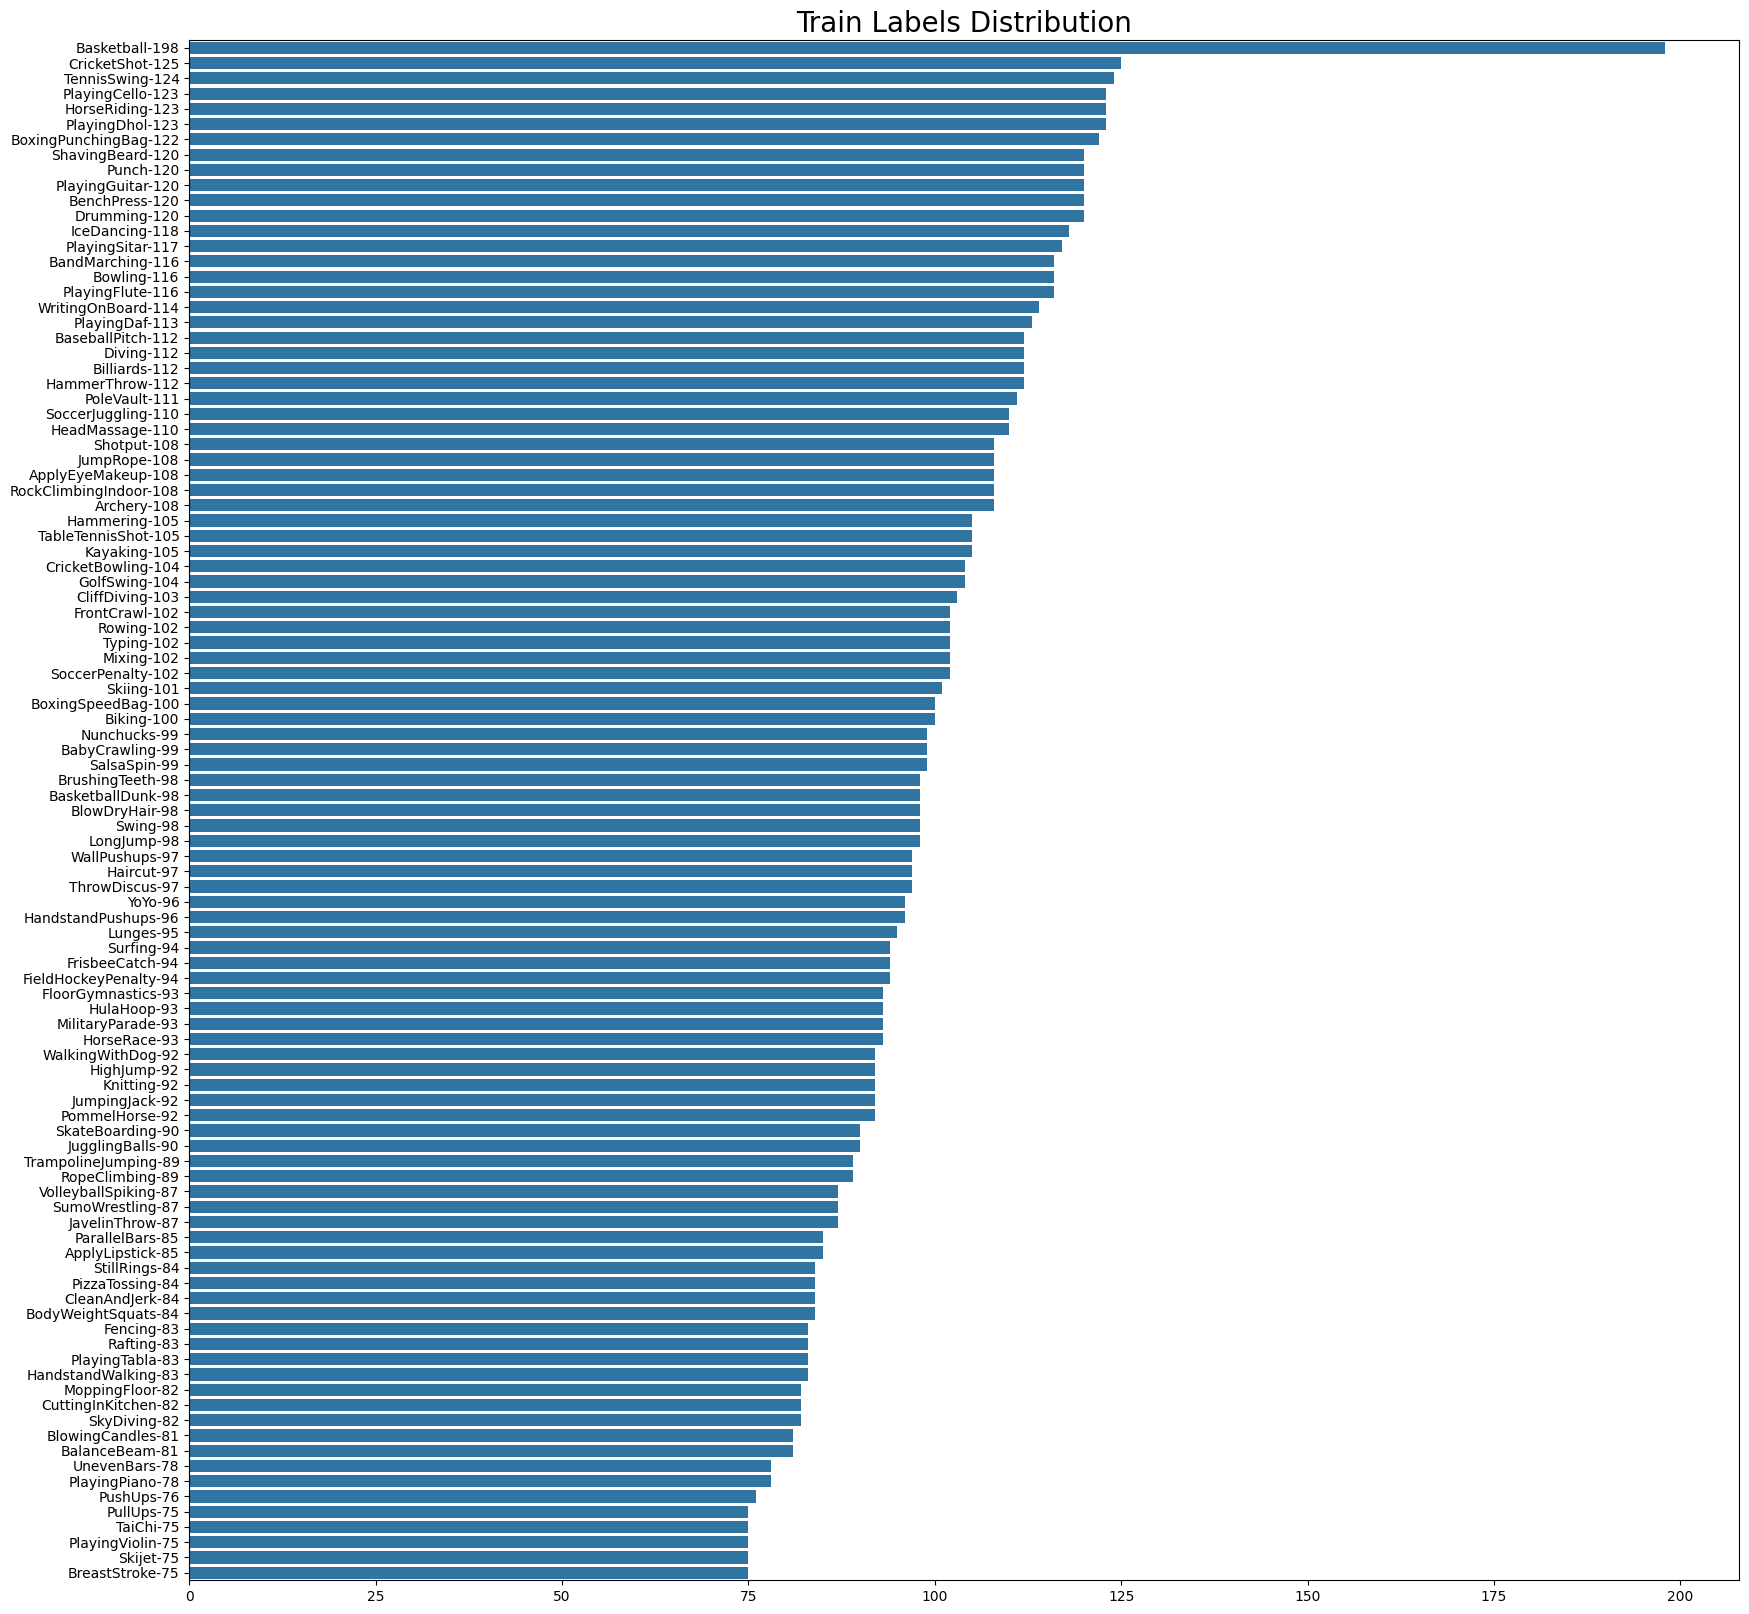

In [7]:
# Plot the label distribution for the training dataset
plt.figure(figsize=(20, 20))
plt.title('Train Labels Distribution', fontsize=20)
label_distribution = train_df['label'].value_counts()

# Create a horizontal bar plot of the label distribution
sns.barplot(x=label_distribution.values,
            y=list(label_distribution.keys() + "-" + label_distribution.values.astype(str)),
            orient="h");

In [8]:
# Define a list of labels to focus on (for specific actions)
PENTA_LABELS = ['BenchPress', 'BoxingPunchingBag', 'HorseRiding', 'PlayingCello', 'PlayingGuitar']


In [9]:
# Filter the DataFrames to include only rows corresponding to the selected labels
train_penta_df = train_df[train_df['label'].isin(PENTA_LABELS)]
val_penta_df = val_df[val_df['label'].isin(PENTA_LABELS)]
test_penta_df = test_df[test_df['label'].isin(PENTA_LABELS)]


In [10]:
# Shuffle the dataframes and reset the indices to ensure randomness
train_penta_df = train_penta_df.sample(frac=1.0).reset_index(drop=True)
val_penta_df = val_penta_df.sample(frac=1.0).reset_index(drop=True)
test_penta_df = test_penta_df.sample(frac=1.0).reset_index(drop=True)


In [11]:
# Add full paths to video clips in the 'clip_path' column
train_penta_df['clip_path'] = train_penta_df['clip_path'].apply(lambda path: DATASET_PATH[:-1] + path)
val_penta_df['clip_path'] = val_penta_df['clip_path'].apply(lambda path: DATASET_PATH[:-1] + path)
test_penta_df['clip_path'] = test_penta_df['clip_path'].apply(lambda path: DATASET_PATH[:-1] + path)


In [12]:
# Display the first 10 rows of the training DataFrame after modification
train_penta_df.head(10)


,clip_name,clip_path,label
0,v_HorseRiding_g03_c07,/content/drive/MyDrive/project_data/train/Hors...,HorseRiding
1,v_PlayingGuitar_g14_c01,/content/drive/MyDrive/project_data/train/Play...,PlayingGuitar
2,v_HorseRiding_g17_c05,/content/drive/MyDrive/project_data/train/Hors...,HorseRiding
3,v_PlayingCello_g21_c02,/content/drive/MyDrive/project_data/train/Play...,PlayingCello
4,v_PlayingGuitar_g20_c01,/content/drive/MyDrive/project_data/train/Play...,PlayingGuitar
5,v_PlayingCello_g18_c01,/content/drive/MyDrive/project_data/train/Play...,PlayingCello
6,v_BoxingPunchingBag_g01_c07,/content/drive/MyDrive/project_data/train/Boxi...,BoxingPunchingBag
7,v_BoxingPunchingBag_g18_c03,/content/drive/MyDrive/project_data/train/Boxi...,BoxingPunchingBag
8,v_BoxingPunchingBag_g12_c02,/content/drive/MyDrive/project_data/train/Boxi...,BoxingPunchingBag
9,v_BoxingPunchingBag_g03_c07,/content/drive/MyDrive/project_data/train/Boxi...,BoxingPunchingBag


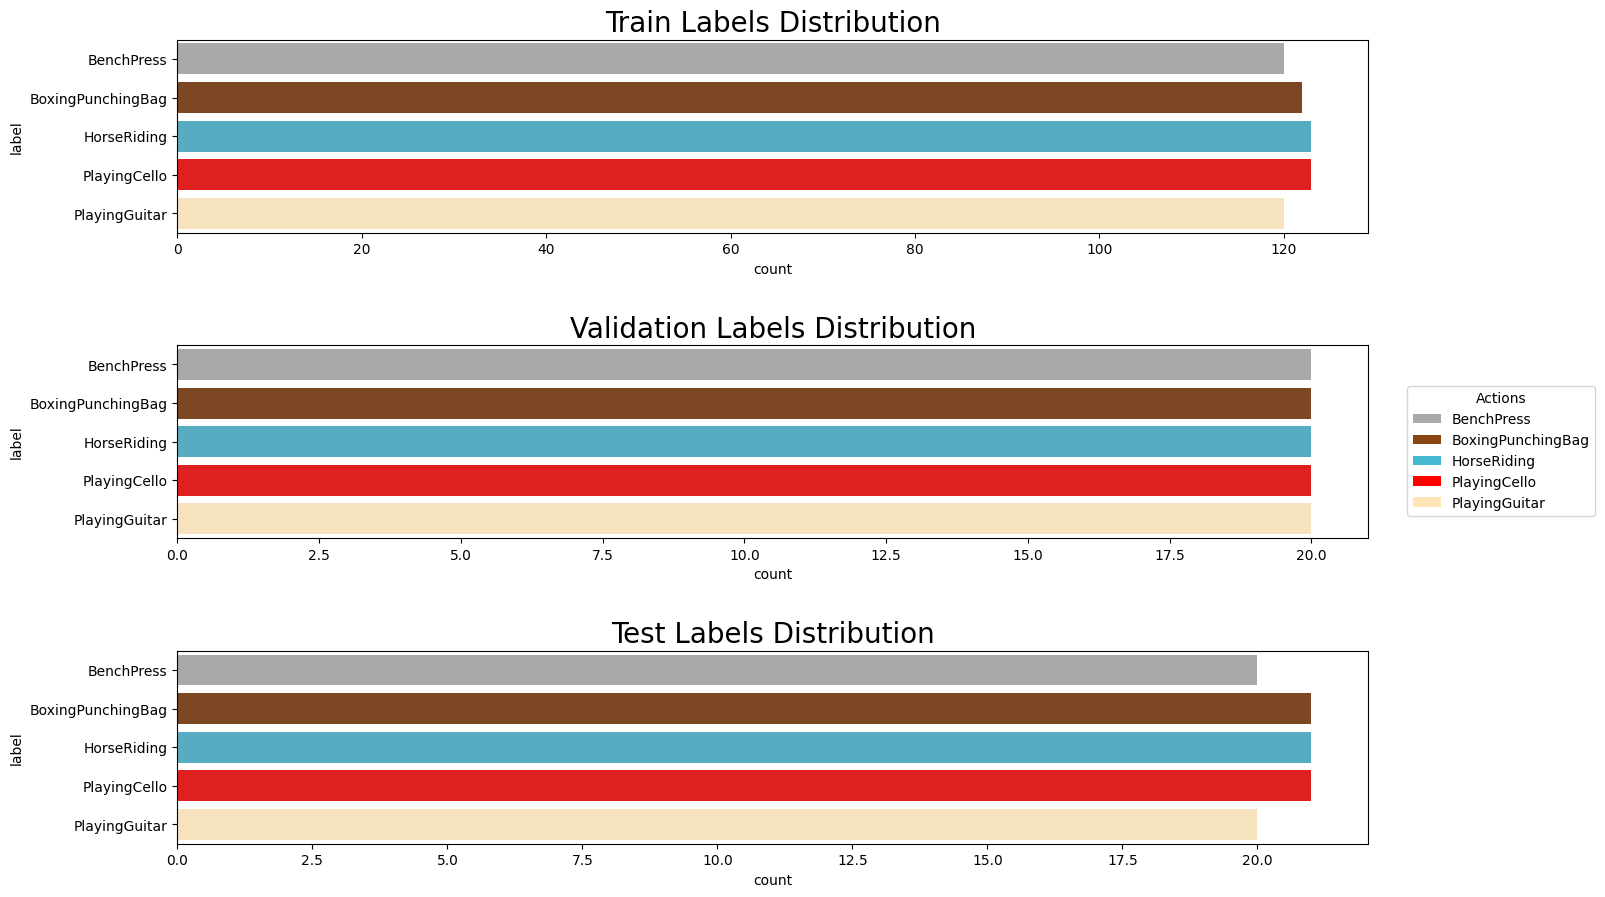

In [13]:
# Define a color palette for each action label to use in plots
color_palette = {
    'BenchPress': '#A9A9A9',  # Grey for weights/metal
    'BoxingPunchingBag': '#8B4513',  # Brown for drums
    'HorseRiding': '#45B7D1',  # Sky Blue
    'PlayingCello': '#FF0000',  # Red for punch
    'PlayingGuitar': '#FFE4B5'  # Light beige for shaving
}

# Create subplots to visualize the label distribution across training, validation, and test datasets
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# Helper function to prepare data for plotting
def prepare_plot_data(distribution):
    return pd.DataFrame({
        'count': distribution.values,
        'label': distribution.index,
    }).sort_values('label')

# Plot distribution of training labels
ax1.set_title('Train Labels Distribution', fontsize=20)
train_plot_df = prepare_plot_data(train_penta_df['label'].value_counts())
sns.barplot(data=train_plot_df,
            x='count',
            y='label',
            hue='label',
            palette=color_palette,
            legend=False,
            orient="h", 
            ax=ax1)

# Plot distribution of validation labels
ax2.set_title('Validation Labels Distribution', fontsize=20)
val_plot_df = prepare_plot_data(val_penta_df['label'].value_counts())
sns.barplot(data=val_plot_df,
            x='count',
            y='label',
            hue='label',
            palette=color_palette,
            legend=False,
            orient="h", 
            ax=ax2)

# Plot distribution of test labels
ax3.set_title('Test Labels Distribution', fontsize=20)
test_plot_df = prepare_plot_data(test_penta_df['label'].value_counts())
sns.barplot(data=test_plot_df,
            x='count',
            y='label',
            hue='label',
            palette=color_palette,
            legend=False,
            orient="h", 
            ax=ax3)

# Add a legend to the plot
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, label=label) 
                  for label, color in color_palette.items()]
fig.legend(handles=legend_elements, 
          loc='center right', 
          bbox_to_anchor=(1.1, 0.5),
          title='Actions')

# Show the plot
plt.show()

In [14]:
# Define a function to load video frames from a video file
def load_video_frames(video_path, frame_step=1, frame_count=10):
    """
    Load frames from a video with a specified frame step and number of frames.
    If the video doesn't have enough frames, generate black frames to fill the remainder.
    
    Args:
        video_path (str): Path to the video file.
        frame_step (int): Step to skip frames. Defaults to 1 (no skipping).
        frame_count (int): Number of frames to load. Defaults to 10.
    
    Returns:
        list: List of video frames (in RGB format).
    """
    cap = cv2.VideoCapture(video_path)  # Open the video file
    frames = []
    frame_idx = 0

    while cap.isOpened() and len(frames) < frame_count:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % frame_step == 0:
            # Convert from BGR (OpenCV format) to RGB (Matplotlib format)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
        frame_idx += 1

    cap.release()  # Close the video capture object

    # Get the shape of the first frame (width, height, channels)
    img_shape = frames[0].shape

    # Generate black frames if the video has fewer frames than required
    while len(frames) < frame_count:
        black_frame = np.zeros(img_shape, dtype=np.uint8)  # Create black frames
        frames.append(black_frame)

    return frames

In [15]:
# Define a function to display frames from the video in a grid layout
def view_frames(frames, frame_step=1):
    """
    Display frames in a grid layout with frame number and frame step in the title.
    
    Args:
        frames (list): List of frames to display.
        frame_step (int): Frame step used for loading the frames.
    """
    n = len(frames)  # Total number of frames
    rows = n // 5  # Calculate number of rows for the grid
    if n % 5 > 0:
        rows += 1

    plt.figure(figsize=(18, 8))  # Set the figure size for the grid
    for idx, frame in enumerate(frames):
        plt.subplot(rows, 5, idx + 1)  # Create a subplot for each frame
        plt.title(f"Frame #{idx * frame_step + 1}")  # Title with frame number
        plt.axis("off")  # Hide axes
        plt.imshow(frame)  # Display the frame
    plt.show()

In [16]:
# Select a random sample from the training set and print the video path
sample_path = random.sample(train_penta_df['clip_path'].to_list(), 1)[0]
print(f"Sample path: {sample_path}")

# Load frames from the selected video sample
frame_step = 15
sample_video = load_video_frames(sample_path, frame_step=frame_step, frame_count=10)


Sample path: /content/drive/MyDrive/project_data/train/HorseRiding/v_HorseRiding_g01_c02.avi


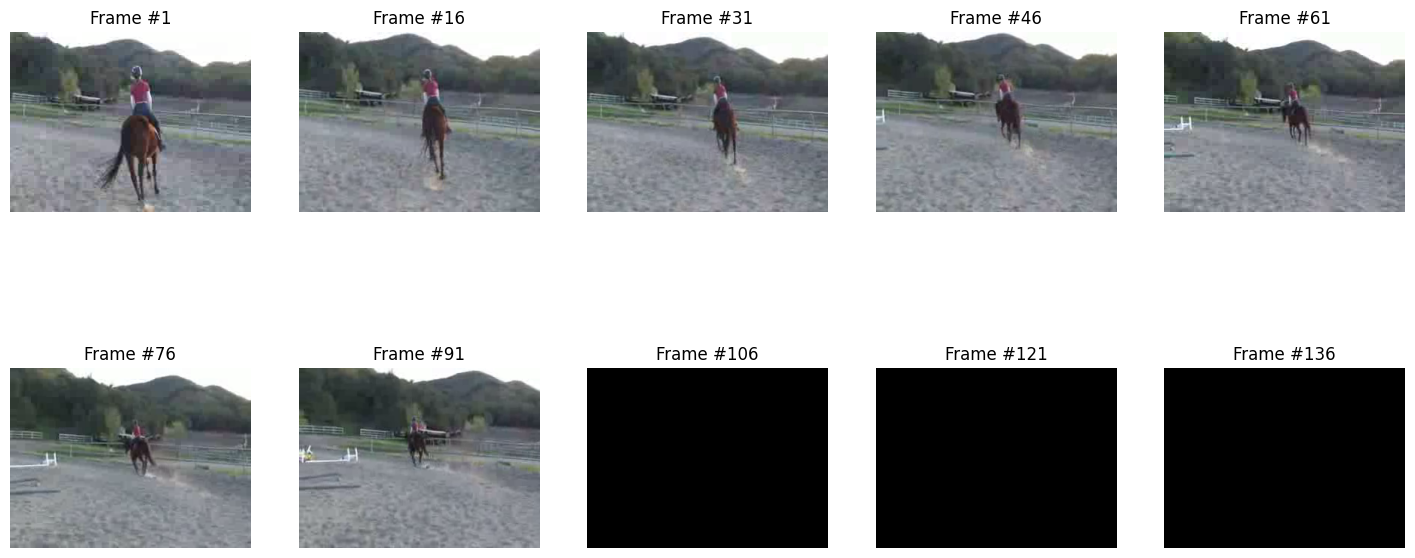

In [17]:
# Display the video frames
view_frames(sample_video, frame_step=frame_step)


In [18]:
# Import necessary classes for Dataset and DataLoader from PyTorch
from torch.utils.data import Dataset, DataLoader


In [19]:
# Define a custom dataset class to handle video sequences
class VideoDataset(Dataset):
    def __init__(self, dataframe, input_frames=10, output_frames=5, stride=3, frame_size=(64, 64), transform=None, color_mode='grayscale'):
        """
        Initialize the dataset with the specified parameters.
        
        Args:
            dataframe (pd.DataFrame): DataFrame containing video file paths.
            input_frames (int): Number of input frames for the model.
            output_frames (int): Number of frames to predict.
            stride (int): Step size to skip between sequences.
            frame_size (tuple): Tuple specifying frame width and height.
            transform (callable, optional): Transform to apply on each frame.
            color_mode (str): 'grayscale' or 'rgb'.
        """
        self.input_frames = input_frames
        self.output_frames = output_frames
        self.sequence_length = self.input_frames + self.output_frames
        self.stride = stride
        self.transform = transform
        self.color_mode = color_mode
        self.frame_size = frame_size
        self.sequences = []  # List to store the sequences of frames
        self.cached_video = None  # Cache the video frames
        self.cached_video_path = None  # Path of the cached video

        # Iterate through the DataFrame to build the sequences list
        for idx, row in dataframe.iterrows():
            video_path = row['clip_path']
            total_frames = self.get_total_frames(video_path)

            # Check if the video has enough frames for the sequence
            if total_frames < self.sequence_length:
                total_sequences = 1  # Only one sequence if the video is too short
            else:
                total_sequences = (total_frames - self.sequence_length) // self.stride + 1

            # Create sequences with the specified stride
            for seq_idx in range(total_sequences):
                start_idx = seq_idx * self.stride
                self.sequences.append({
                    'video_path': video_path,
                    'start_idx': start_idx,
                    'total_frames': total_frames
                })

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        """Fetch a sequence of frames for training or testing."""
        sequence_info = self.sequences[idx]
        video_path = sequence_info['video_path']
        start_idx = sequence_info['start_idx']
        total_frames = sequence_info['total_frames']

        # Check if the video is cached, if not, load the video
        if self.cached_video_path != video_path:
            self.cached_video = self.load_video(video_path)
            self.cached_video_path = video_path

        # Extract the frames from the cached video
        end_idx = start_idx + self.sequence_length
        frames = self.cached_video[start_idx:end_idx]

        # If the frames are fewer than required, augment them with the last frame
        if len(frames) < self.sequence_length:
            frames = self.augment_frames(frames, self.sequence_length)

        # Split into input and target sequences
        input_seq = frames[:self.input_frames]
        target_seq = frames[self.input_frames:]

        # Convert to grayscale if necessary
        if self.color_mode == 'grayscale':
            input_seq = input_seq[..., np.newaxis]
            target_seq = target_seq[..., np.newaxis]

        # Change frame dimensions to match PyTorch input format (C, H, W)
        input_seq = input_seq.transpose(0, 3, 1, 2)
        target_seq = target_seq.transpose(0, 3, 1, 2)

        # Convert to torch tensors and normalize the pixel values
        input_seq = torch.from_numpy(input_seq).float() / 255.0
        target_seq = torch.from_numpy(target_seq).float() / 255.0

        # Apply any additional transformations (e.g., data augmentation)
        if self.transform:
            input_seq = self.apply_transform(input_seq)
            target_seq = self.apply_transform(target_seq)

        return {'input': input_seq, 'target': target_seq}

    def load_video(self, video_path):
        """Load all frames from a video into memory."""
        cap = cv2.VideoCapture(video_path)
        frames = []
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, self.frame_size)
            if self.color_mode == 'grayscale':
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            else:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
        cap.release()
        return np.array(frames)

    def augment_frames(self, frames, required_length):
        """Augment frames to meet the required length by repeating the last frame."""
        current_length = len(frames)
        deficit = required_length - current_length

        # Repeat the last frame to fill the gap
        last_frame = frames[-1] if len(frames) > 0 else np.zeros((self.frame_size[1], self.frame_size[0], 3), dtype=np.uint8)
        augmented_frames = np.concatenate([frames, np.repeat(last_frame[np.newaxis, ...], deficit, axis=0)], axis=0)

        return augmented_frames

    def get_total_frames(self, video_path):
        """Get the total number of frames in a video."""
        cap = cv2.VideoCapture(video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        cap.release()
        return total_frames

    def apply_transform(self, sequence):
        """Apply the transform to each frame in the sequence."""
        transformed_sequence = []
        for frame in sequence:
            frame = self.transform(frame)
            transformed_sequence.append(frame)
        if len(transformed_sequence) == 0:
            raise ValueError("Transformed sequence is empty.")
        transformed_sequence = torch.stack(transformed_sequence)
        return transformed_sequence

In [20]:
# Parameters for dataset and dataloaders
batch_size = 32                 # Number of sequences per batch
color_mode = 'rgb'              # or 'grayscale'
input_frames = 10               # Number of input frames for prediction
output_frames = 5               # Number of frames to predict
stride = 5                      # Number of frames to skip between sequences (stride - 1)
frame_size = (64, 64)           # Resize each frame to 64x64
num_workers = 0                 # Number of workers for data loading

In [21]:
# Define the normalization transform for input frames
import torchvision.transforms as transforms

if color_mode == 'grayscale':
    transform = transforms.Compose([transforms.Normalize(mean=[0.5], std=[0.5])])
else:
    transform = transforms.Compose([transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])


In [22]:
# Create the dataset instances for training, validation, and test
train_dataset = VideoDataset(train_penta_df, input_frames, output_frames, stride, frame_size, transform, color_mode)
val_dataset = VideoDataset(val_penta_df, input_frames, output_frames, stride, frame_size, transform, color_mode)
test_dataset = VideoDataset(test_penta_df, input_frames, output_frames, stride, frame_size, transform, color_mode)


In [23]:
# Create data loaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)


In [24]:
# Print the total number of batches in the train loader
print(f"Total train batches: {len(train_loader)}")

# Print the total number of sequences in the training dataset
print(f"Total train sequences: {len(train_dataset)}")

# Print the total number of frames in the training dataset
print(f"Total train frames: {len(train_dataset) * train_dataset.sequence_length}")


Total train batches: 703
Total train sequences: 22486
Total train frames: 337290


In [25]:
# Fetch and display a batch of training data
for batch in train_loader:
    input_seq = batch['input']  # Shape: [batch_size, input_frames, channels, height, width]
    target_seq = batch['target']  # Shape: [batch_size, output_frames, channels, height, width]

    print(f"Input sequence shape: {input_seq.shape}")
    print(f"Target sequence shape: {target_seq.shape}")

    # Break after processing the first batch
    break

Input sequence shape: torch.Size([32, 10, 3, 64, 64])
Target sequence shape: torch.Size([32, 5, 3, 64, 64])


In [26]:
import torch.nn as nn
import torch.optim as optim


In [27]:
class ConvLSTMCell(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size, bias):
        """
        Initialize ConvLSTM cell.

        Args:
            input_dim (int): Number of channels in the input tensor (e.g., RGB channels).
            hidden_dim (int): Number of channels in the hidden state.
            kernel_size (tuple): Size of the convolutional kernel (height, width).
            bias (bool): Whether or not to include a bias term in the convolutions.
        """
        super(ConvLSTMCell, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        # Calculate padding to maintain the same spatial dimensions after convolution
        self.kernel_size = kernel_size
        self.padding = kernel_size[0] // 2, kernel_size[1] // 2
        self.bias = bias

        # Convolution layer: produces four channels for the input, forget, cell, and output gates
        self.conv = nn.Conv2d(
            in_channels=self.input_dim + self.hidden_dim,
            out_channels=4 * self.hidden_dim,  # 4 gates: input, forget, output, and candidate
            kernel_size=self.kernel_size,
            padding=self.padding,
            bias=self.bias
        )

    def forward(self, input_tensor, cur_state):
        """
        Forward pass for a single ConvLSTM cell.

        Args:
            input_tensor (Tensor): Input tensor for the current time step.
            cur_state (tuple): Current hidden state (h_cur, c_cur) for this time step.

        Returns:
            h_next (Tensor): Next hidden state.
            c_next (Tensor): Next cell state.
        """
        h_cur, c_cur = cur_state

        # Combine the input tensor with the previous hidden state for processing
        combined = torch.cat([input_tensor, h_cur], dim=1)  # Concatenate along channel axis

        # Pass through the convolutional layer (outputs 4 tensors for the gates)
        combined_conv = self.conv(combined)

        # Split the output into 4 components: input gate (i), forget gate (f),
        # output gate (o), and candidate cell state (g)
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)

        # Apply sigmoid activation to the gates and tanh for the candidate cell state
        i = torch.sigmoid(cc_i)  # Input gate
        f = torch.sigmoid(cc_f)  # Forget gate
        o = torch.sigmoid(cc_o)  # Output gate
        g = torch.tanh(cc_g)     # Candidate cell state

        # Update the cell state (c_next) and hidden state (h_next)
        c_next = f * c_cur + i * g  # Cell state
        h_next = o * torch.tanh(c_next)  # Hidden state

        return h_next, c_next

    def init_hidden(self, batch_size, spatial_size):
        """
        Initializes the hidden and cell states to zeros at the beginning of training.

        Args:
            batch_size (int): Number of sequences in the batch.
            spatial_size (tuple): The height and width of the input frames.

        Returns:
            (Tensor, Tensor): The initial hidden state and cell state.
        """
        height, width = spatial_size
        # Initialize both the hidden state and cell state with zeros
        return (
            torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device),
            torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device)
        )


In [28]:
class ConvLSTM(nn.Module):
    """
    A multi-layer ConvLSTM module that processes sequences of frames.

    Args:
        input_dim (int): Number of input channels (e.g., RGB channels).
        hidden_dims (list): List of hidden dimensions for each layer.
        kernel_size (tuple): Size of the convolution kernel.
        num_layers (int): Number of layers in the ConvLSTM.
        batch_first (bool): If True, the input is expected in (batch, seq_len, ...) format.
        return_all_layers (bool): If True, return all layers' outputs. Otherwise, return only the last one.
    """
    def __init__(self, input_dim, hidden_dims, kernel_size, num_layers, batch_first=True, bias=True, return_all_layers=False):
        super(ConvLSTM, self).__init__()

        self.input_dim = input_dim
        self.hidden_dims = hidden_dims
        self.kernel_size = self._extend_for_multilayer(kernel_size, num_layers)
        self.num_layers = num_layers
        self.batch_first = batch_first
        self.bias = bias
        self.return_all_layers = return_all_layers

        # Initialize the ConvLSTM cells for each layer
        cell_list = []
        for i in range(self.num_layers):
            cur_input_dim = self.input_dim if i == 0 else self.hidden_dims[i - 1]

            # Add a ConvLSTMCell to the list
            cell = ConvLSTMCell(
                input_dim=cur_input_dim,
                hidden_dim=self.hidden_dims[i],
                kernel_size=self.kernel_size[i],
                bias=self.bias
            )
            cell_list.append(cell)

        self.cell_list = nn.ModuleList(cell_list)

    def forward(self, input_tensor, hidden_state=None):
        """
        Forward pass through the ConvLSTM network.

        Args:
            input_tensor (Tensor): Input tensor with shape (batch, seq_len, channels, height, width).
            hidden_state (tuple, optional): Initial hidden state and cell state for each layer.

        Returns:
            output (Tensor): The output of the ConvLSTM at each time step.
            last_state (tuple): The hidden and cell states at the last time step.
        """
        if not self.batch_first:
            # Convert to (seq_len, batch, channels, height, width) if batch_first=False
            input_tensor = input_tensor.permute(1, 0, 2, 3, 4)

        b, seq_len, _, h, w = input_tensor.size()

        # Initialize the hidden states if they are not provided
        if hidden_state is None:
            hidden_state = self._init_hidden(batch_size=b, spatial_size=(h, w))

        layer_output_list = []
        last_state_list = []

        # Iterate over each time step in the sequence
        for layer_idx in range(self.num_layers):

            h, c = hidden_state[layer_idx]  # Get the hidden and cell states for the current layer
            output_inner = []

            # Process each time step in the sequence
            for t in range(seq_len):
                h, c = self.cell_list[layer_idx](
                    input_tensor=input_tensor[:, t, :, :, :],  # Get the input for time step t
                    cur_state=[h, c]  # Current state for the layer
                )
                output_inner.append(h)  # Collect the output for the time step

            # Stack outputs across time steps for the current layer
            layer_output = torch.stack(output_inner, dim=1)
            layer_output_list.append(layer_output)
            last_state_list.append([h, c])

        if self.return_all_layers:
            return layer_output_list, last_state_list  # Return outputs for all layers
        else:
            return layer_output_list[-1], last_state_list[-1]  # Return output for the last layer

    def _init_hidden(self, batch_size, spatial_size):
        """
        Initialize hidden and cell states for each layer.

        Args:
            batch_size (int): Number of sequences in the batch.
            spatial_size (tuple): Height and width of the input frames.

        Returns:
            init_states (list): A list of initial states for each layer.
        """
        init_states = []
        for i in range(self.num_layers):
            init_states.append(self.cell_list[i].init_hidden(batch_size, spatial_size))
        return init_states

    @staticmethod
    def _extend_for_multilayer(param, num_layers):
        """
        Ensure that parameters like kernel_size are extended to match the number of layers.

        Args:
            param (list or tuple): Parameter to extend.
            num_layers (int): The number of layers.

        Returns:
            list: A list of parameters, one for each layer.
        """
        if not isinstance(param, list):
            param = [param] * num_layers
        return param

In [29]:
class ConvLSTMModel(nn.Module):
    """
    ConvLSTM model for sequence prediction.

    Args:
        input_channels (int): Number of input channels (e.g., RGB).
        hidden_channels (list): List of hidden dimensions for each ConvLSTM layer.
        kernel_size (tuple): Size of the convolutional kernel.
        num_layers (int): Number of layers in the ConvLSTM.
        output_channels (int): Number of channels in the output.
        output_frames (int): Number of frames to predict.
    """
    def __init__(self, input_channels=3, hidden_channels=[64, 64, 64], kernel_size=(3, 3), num_layers=3, output_channels=3, output_frames=5):
        super(ConvLSTMModel, self).__init__()
        self.output_frames = output_frames

        # Define the ConvLSTM layer
        self.conv_lstm = ConvLSTM(
            input_dim=input_channels,
            hidden_dims=hidden_channels,
            kernel_size=kernel_size,
            num_layers=num_layers,
            batch_first=True,
            bias=True,
            return_all_layers=False
        )

        # Final convolution layer to map to output channels
        self.conv = nn.Conv2d(
            in_channels=hidden_channels[-1],
            out_channels=output_channels,
            kernel_size=(1, 1),
            padding=0
        )

    def forward(self, input_tensor):
        """
        Forward pass through the ConvLSTM model.

        Args:
            input_tensor (Tensor): Input tensor with shape (batch, seq_len, channels, height, width).

        Returns:
            outputs (Tensor): The predicted frames.
        """
        # Pass input through ConvLSTM layers
        lstm_output, _ = self.conv_lstm(input_tensor)

        # Apply the final convolution layer to each time step's output
        outputs = []
        for t in range(lstm_output.size(1)):
            x = lstm_output[:, t, :, :, :]  # Select the output for time step t
            x = self.conv(x)  # Apply the convolution
            outputs.append(x)

        # Stack the outputs and select the last `output_frames`
        outputs = torch.stack(outputs, dim=1)
        return outputs[:, -self.output_frames:, :, :, :]

In [30]:
# Initialize the model
model = ConvLSTMModel(
    input_channels=3,               # RGB input
    hidden_channels=[128, 64, 64],  # Hidden channels for each layer
    kernel_size=(3, 3),             # Kernel size
    num_layers=3,                   # Number of ConvLSTM layers
    output_channels=3,              # Output should have the same number of channels as input (RGB)
    output_frames=5                 # Predict 5 frames
)

# Move model to the correct device (GPU/CPU)
model = model.to(device)

In [31]:
!pip install torchinfo

In [32]:
from torchinfo import summary

# Set dummy input for summary
batch_size = 1
input_frames = 10
channels = 3
height = 64
width = 64

dummy_input = torch.randn(batch_size, input_frames, channels, height, width).to(device)


In [33]:
# Get model summary
# Note: torchsummary may not fully support models with sequences; alternatively, we can print the model
print(model)

# Or simply test the forward pass
output = model(dummy_input)
print(f"\nOutput shape: {output.shape}")  # Should be (batch_size, output_frames, channels, height, width)


ConvLSTMModel(
  (conv_lstm): ConvLSTM(
    (cell_list): ModuleList(
      (0): ConvLSTMCell(
        (conv): Conv2d(131, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): ConvLSTMCell(
        (conv): Conv2d(192, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (2): ConvLSTMCell(
        (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
  )
  (conv): Conv2d(64, 3, kernel_size=(1, 1), stride=(1, 1))
)

Output shape: torch.Size([1, 5, 3, 64, 64])


In [34]:

summary(model, input_size=(batch_size, input_frames, channels, height, width))


Layer (type:depth-idx)                   Output Shape              Param #
ConvLSTMModel                            [1, 5, 3, 64, 64]         --
├─ConvLSTM: 1-1                          [1, 10, 64, 64, 64]       --
│    └─ModuleList: 2-1                   --                        --
│    │    └─ConvLSTMCell: 3-1            [1, 128, 64, 64]          604,160
│    │    └─ConvLSTMCell: 3-2            [1, 128, 64, 64]          (recursive)
│    │    └─ConvLSTMCell: 3-3            [1, 128, 64, 64]          (recursive)
│    │    └─ConvLSTMCell: 3-4            [1, 128, 64, 64]          (recursive)
│    │    └─ConvLSTMCell: 3-5            [1, 128, 64, 64]          (recursive)
│    │    └─ConvLSTMCell: 3-6            [1, 128, 64, 64]          (recursive)
│    │    └─ConvLSTMCell: 3-7            [1, 128, 64, 64]          (recursive)
│    │    └─ConvLSTMCell: 3-8            [1, 128, 64, 64]          (recursive)
│    │    └─ConvLSTMCell: 3-9            [1, 128, 64, 64]          (recursive)
│    │  

In [35]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last improvement.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change to qualify as an improvement.
        """
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.counter = 0

    def __call__(self, val_loss):

        score = -val_loss  # Since we want to minimize validation loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss)
            self.counter = 0

    def save_checkpoint(self, val_loss):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            print(f'Validation loss decreased. Saving model...')
            torch.save(model.state_dict(), f'model_{val_loss:.6f}.pth')


In [36]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 3.7 MB/s eta 0:00:00


In [37]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchmetrics.image import StructuralSimilarityIndexMeasure

# Define the loss function (MSE Loss)
criterion = nn.MSELoss()

# Define the optimizer (Adam)
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=2, verbose=True)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.3, patience=1, verbose=True, threshold=0.001)

# Initialize SSIM metric
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0).to(device)


In [38]:
from tqdm import tqdm  # Import tqdm for progress bars

# Training parameters
num_epochs = 8
train_losses = []
val_losses = []
ssim_scores = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Initialize progress bar for training
    train_loader_tqdm = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch [{epoch+1}/{num_epochs}]")

    for batch_idx, batch in train_loader_tqdm:
        # Move data to device
        inputs = batch['input'].to(device)  # Shape: [batch_size, input_frames, channels, H, W]
        targets = batch['target'].to(device)  # Shape: [batch_size, output_frames, channels, H, W]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)  # Shape: [batch_size, output_frames, channels, H, W]

        # Compute loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item() * inputs.size(0)

        # Update progress bar with current loss
        train_loader_tqdm.set_postfix(loss=loss.item())

    # Compute average training loss for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    print(f'\nEpoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0.0
    ssim_score = 0.0

    # Initialize progress bar for validation
    val_loader_tqdm = tqdm(val_loader, desc=f"Validation [{epoch+1}/{num_epochs}]")
    with torch.no_grad():
        for batch in val_loader_tqdm:
            inputs = batch['input'].to(device)
            targets = batch['target'].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)

            # Compute SSIM for each frame in the sequence and average
            batch_ssim = 0.0
            for t in range(targets.size(1)):
                target_frame = targets[:, t, :, :, :]  # Shape: [batch_size, channels, H, W]
                output_frame = outputs[:, t, :, :, :]  # Shape: [batch_size, channels, H, W]
                ssim_value = ssim_metric(output_frame, target_frame)
                batch_ssim += ssim_value.item()
            batch_ssim /= targets.size(1)
            ssim_score += batch_ssim * inputs.size(0)

        val_loss /= len(val_loader.dataset)
        ssim_score /= len(val_loader.dataset)
        val_losses.append(val_loss)
        ssim_scores.append(ssim_score)
        print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, SSIM: {ssim_score:.4f}')

    # Step the scheduler
    scheduler.step(val_loss)

    # Print learning rate after scheduler step
    for param_group in optimizer.param_groups:
        print(f"Learning Rate after epoch {epoch+1}: {param_group['lr']}")

    # Check early stopping
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

Epoch [1/8]: 100%|██████████| 703/703 [26:37<00:00,  2.27s/it, loss=0.0111]



Epoch [1/8], Training Loss: 0.0518


Validation [1/8]: 100%|██████████| 115/115 [01:24<00:00,  1.37it/s]


Epoch [1/8], Validation Loss: 0.0423, SSIM: 0.6632
Learning Rate after epoch 1: 0.001
Validation loss decreased. Saving model...


Epoch [2/8]: 100%|██████████| 703/703 [26:38<00:00,  2.27s/it, loss=0.00924]



Epoch [2/8], Training Loss: 0.0382


Validation [2/8]: 100%|██████████| 115/115 [01:23<00:00,  1.38it/s]


Epoch [2/8], Validation Loss: 0.0388, SSIM: 0.6778
Learning Rate after epoch 2: 0.001
Validation loss decreased. Saving model...


Epoch [3/8]: 100%|██████████| 703/703 [26:30<00:00,  2.26s/it, loss=0.00817]



Epoch [3/8], Training Loss: 0.0356


Validation [3/8]: 100%|██████████| 115/115 [01:23<00:00,  1.37it/s]


Epoch [3/8], Validation Loss: 0.0362, SSIM: 0.6920
Learning Rate after epoch 3: 0.001
Validation loss decreased. Saving model...


Epoch [4/8]: 100%|██████████| 703/703 [26:30<00:00,  2.26s/it, loss=0.0079]



Epoch [4/8], Training Loss: 0.0346


Validation [4/8]: 100%|██████████| 115/115 [01:23<00:00,  1.38it/s]


Epoch [4/8], Validation Loss: 0.0353, SSIM: 0.6964
Learning Rate after epoch 4: 0.001
Validation loss decreased. Saving model...


Epoch [5/8]: 100%|██████████| 703/703 [26:29<00:00,  2.26s/it, loss=0.00757]



Epoch [5/8], Training Loss: 0.0332


Validation [5/8]: 100%|██████████| 115/115 [01:23<00:00,  1.38it/s]


Epoch [5/8], Validation Loss: 0.0346, SSIM: 0.7023
Learning Rate after epoch 5: 0.001
Validation loss decreased. Saving model...


Epoch [6/8]: 100%|██████████| 703/703 [26:34<00:00,  2.27s/it, loss=0.00748]



Epoch [6/8], Training Loss: 0.0327


Validation [6/8]: 100%|██████████| 115/115 [01:24<00:00,  1.37it/s]


Epoch [6/8], Validation Loss: 0.0343, SSIM: 0.7049
Learning Rate after epoch 6: 0.001
Validation loss decreased. Saving model...


Epoch [7/8]: 100%|██████████| 703/703 [26:32<00:00,  2.26s/it, loss=0.00743]



Epoch [7/8], Training Loss: 0.0324


Validation [7/8]: 100%|██████████| 115/115 [01:23<00:00,  1.37it/s]


Epoch [7/8], Validation Loss: 0.0340, SSIM: 0.7063
Learning Rate after epoch 7: 0.001
Validation loss decreased. Saving model...


Epoch [8/8]: 100%|██████████| 703/703 [26:31<00:00,  2.26s/it, loss=0.00733]



Epoch [8/8], Training Loss: 0.0321


Validation [8/8]: 100%|██████████| 115/115 [01:23<00:00,  1.38it/s]

Epoch [8/8], Validation Loss: 0.0336, SSIM: 0.7090
Learning Rate after epoch 8: 0.001
Validation loss decreased. Saving model...


In [39]:
# Save the model checkpoint
torch.save(model.state_dict(), 'convlstm_model.pth')


In [40]:
from google.colab import files

# Download the file locally
files.download('convlstm_model.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

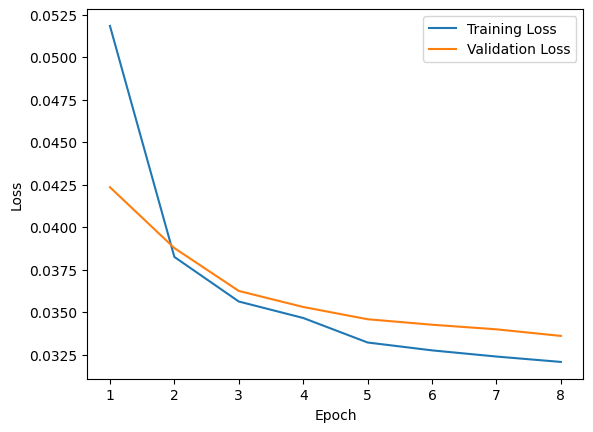

In [41]:
# Plot the training and validation losses

plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [42]:
# Evaluation on Test Set
model.eval()
test_loss = 0.0
test_ssim = 0.0
with torch.no_grad():
    for batch in test_loader:
        inputs = batch['input'].to(device)
        targets = batch['target'].to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item() * inputs.size(0)

        # Compute SSIM
        batch_ssim = 0.0
        for t in range(targets.size(1)):
            target_frame = targets[:, t, :, :, :]   # Shape: [batch_size, channels, H, W]
            output_frame = outputs[:, t, :, :, :]   # Shape: [batch_size, channels, H, W]
            ssim_value = ssim_metric(output_frame, target_frame)
            batch_ssim += ssim_value.item()
        batch_ssim /= targets.size(1)
        test_ssim += batch_ssim * inputs.size(0)

test_loss /= len(test_loader.dataset)
test_ssim /= len(test_loader.dataset)
print(f'Test Loss: {test_loss:.4f}, Test SSIM: {test_ssim:.4f}')


Test Loss: 0.0304, Test SSIM: 0.7171
